In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re

You can have access to this exam on github by clicking on this link: https://github.com/nobac3/FNAC-DARTY-SUSHISHOP/blob/master/Cabon_Antoine%20MD5%20Datascience.ipynb 

In [2]:
df = pd.read_csv('comments.csv')

In [3]:
df.head()

,Unnamed: 0,marque,rates,comments,datePublished,dateService,author,answer
0,0,DARTY,5,Site internet clair et simple a la navigation....,2020-08-21,15/07/2020,np.nan,np.nan
1,1,DARTY,5,Tout bon,2020-08-21,21/06/2020,np.nan,np.nan
2,2,DARTY,5,La livraison à été conforme à mes attentes. Je...,2020-08-21,15/07/2020,np.nan,np.nan
3,3,DARTY,4,discordance entre les dates de disponibilité a...,2020-08-21,12/07/2020,np.nan,np.nan
4,4,DARTY,5,Impossible de faire un lavage à l'eau froide ;...,2020-08-21,25/07/2020,np.nan,np.nan


In [4]:
df.info()
# length of the dataset: 90440

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90440 entries, 0 to 90439
Data columns (total 8 columns):
Unnamed: 0       90440 non-null int64
marque           90440 non-null object
rates            90440 non-null int64
comments         90440 non-null object
datePublished    90440 non-null object
dateService      90440 non-null object
author           90440 non-null object
answer           90440 non-null object
dtypes: int64(2), object(6)
memory usage: 5.5+ MB


In [5]:
df.describe()

,Unnamed: 0,rates
count,90440.000000,90440.000000
mean,2084.868200,4.464065
std,1816.729122,1.015831
min,0.000000,1.000000
25%,833.000000,4.000000
50%,1671.000000,5.000000
75%,2519.250000,5.000000
max,10009.000000,5.000000


In [6]:
# we have only one numerical column that is the rate. The rest of the dataset contains: dates, comments and categorical columns 
# the first descriptive analysis that we can conclude is the the mean of the rates which is 4.4 we can conclude that most people are happy with the products they bought

In [7]:
# let's first check if we have any null values in our table: 

df.isnull().sum().sum()

0

In [8]:
# we have no null values in our dataset. But let's verify if each column 
# we can remove the unnamed column as it is not necessary and only shows the index of the row

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.head()
# now our dataset is ready to be analysed
# we re going to analyse more or less the results of each of those columns

,marque,rates,comments,datePublished,dateService,author,answer
0,DARTY,5,Site internet clair et simple a la navigation....,2020-08-21,15/07/2020,np.nan,np.nan
1,DARTY,5,Tout bon,2020-08-21,21/06/2020,np.nan,np.nan
2,DARTY,5,La livraison à été conforme à mes attentes. Je...,2020-08-21,15/07/2020,np.nan,np.nan
3,DARTY,4,discordance entre les dates de disponibilité a...,2020-08-21,12/07/2020,np.nan,np.nan
4,DARTY,5,Impossible de faire un lavage à l'eau froide ;...,2020-08-21,25/07/2020,np.nan,np.nan


In [11]:
df['marque'].value_counts()

FNAC         45060
DARTY        42870
SUSHISHOP     2510
Name: marque, dtype: int64

In [12]:
# Comments come from three party: FNAC DARTY OR SUSHI SHOP

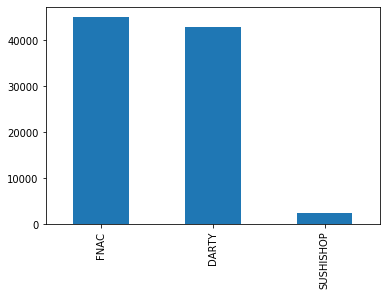

In [13]:
df['marque'].value_counts().plot.bar()

In [14]:
# based on the graph above we can conclude that most of the comments come from FNAC or DARTY.

In [15]:
df['rates'].value_counts()

5    63033
4    16515
3     4903
1     4182
2     1807
Name: rates, dtype: int64

In [16]:
# the rates go from 1 to 5. Let's analyse which brand has the highest rate

In [17]:
df[df['marque'] == 'FNAC']['rates'].mean()

4.523146915224146

In [18]:
df[df['marque'] == 'DARTY']['rates'].mean()

4.418544436668999

In [19]:
df[df['marque'] == 'SUSHISHOP']['rates'].mean()

4.180876494023904

In [20]:
# most of our consumers are more happy with fnac products then sushi even though overall people are really happy with the service

In [21]:
# for the comment column let's just see how many times the word "bon" is used 

In [22]:
# Convert Dataframe into Scattertext Corpus

In [23]:
pip install wordcloud

You should consider upgrading via the '/usr/local/opt/python/bin/python3.6 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


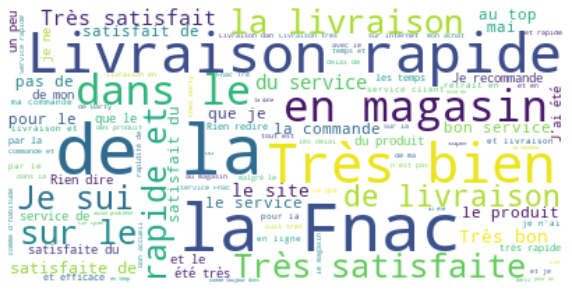

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(list(df['comments'])))
plt.figure(figsize=(10, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
# the analysis above represents the words most used in the comments
# based on this first analysis the most words used are: Fnac, Rapide, Très bien Très satisfaite, livraison
# in our word cloud we can see that a lot of words don't need to be there and they don't tell us a lot about the meaning of review of the service. So we can clean the data by removing the articles and putting each word in a list for later analysis

In [26]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /Users/antoine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
from nltk import word_tokenize
from nltk.corpus import stopwords

In [28]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("french"))

In [29]:
def clean_review(raw_review: str) -> str:
    
    raw_review = ''.join([i for i in raw_review if not i.isdigit()])
    raw_review = raw_review.replace('<br />', '')
    raw_review = re.sub('[^A-Za-z]+', ' ', raw_review)
    raw_review = ' '.join(raw_review.split())
    raw_review = raw_review.lstrip()\
    .rstrip()\
    .lower()
    
    return raw_review

def lemmatize(tokens: list) -> list:
    # 1. Lemmatize
    tokens = list(map(lemmatizer.lemmatize, tokens))
    lemmatized_tokens = list(map(lambda x: lemmatizer.lemmatize(x, "v"), tokens))
    # 2. Remove stop words
    meaningful_words = list(filter(lambda x: not x in stop_words, lemmatized_tokens))
    return meaningful_words

def preprocess(review: str, total: int, show_progress: bool = True) -> list:
    if show_progress:
        global counter
        counter += 1
        print('Processing... %6i/%6i'% (counter, total), end='\r')
    # 1. Clean text
    review = clean_review(review)
    # 2. Split into individual words
    tokens = word_tokenize(review)
    # 3. Lemmatize
    lemmas = lemmatize(tokens)
    # 4. Join the words back into one string separated by space,
    # and return the result.
    return ' '.join(lemmas)

In [30]:
# out of our definition above we get a corpus of all our comments. Let's see how this looks like

In [31]:
counter = 0
corpus = np.array(list(map(lambda x: preprocess(x, len(df['comments'])), df['comments'])))

In [32]:
# we can verify if our corpus was done properly 
# let's see what the first row has to offer

In [33]:
# before
df['comments'][0]

'Site internet clair et simple a la navigation. Parfait'

In [34]:
# after
corpus[0]

'site internet clair simple a navigation parfait'

In [35]:
# now let's look into the date published column

In [36]:
# we need to convert the object column into actual dates
df['datePublished'] = pd.to_datetime(df['datePublished'], format='%Y-%m-%d', errors='ignore')

In [37]:
df['dateService'] = pd.to_datetime(df['dateService'], format='%d/%m/%Y', errors='ignore')

In [38]:
df['datePublishedYear'] = df['datePublished'].dt.year 

In [39]:
df['dateServiceYear'] = df['dateService'].dt.year

In [40]:
# let's see which year has the most reviews 

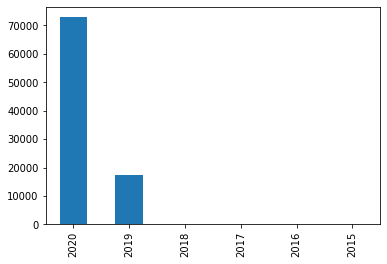

In [41]:
df['dateServiceYear'].value_counts().plot.bar()

In [42]:
# ok most of the date service year was in 2020 

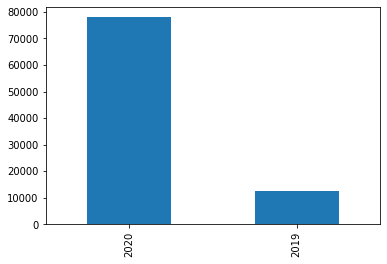

In [43]:
df['datePublishedYear'].value_counts().plot.bar()

In [44]:
# the publish year was in 2020 or 2019 but mostly in 2020 

In [45]:
# now our last columns: author and answer

In [46]:
df['author'].value_counts()

np.nan                   89915
FNAC SA                    309
SUSHI SHOP MANAGEMENT      141
DARTY                       75
Name: author, dtype: int64

In [47]:
# let's dig into the answers a little bit

In [48]:
len(df[(df['author']== 'SUSHI SHOP MANAGEMENT') & (df['marque']=='SUSHISHOP')])

141

In [49]:
len(df[(df['author']== 'FNAC SA') & (df['marque']=='FNAC')])

309

In [50]:
len(df[(df['author']== 'DARTY') & (df['marque']=='DARTY')])

75

In [51]:
df[df['answer'] != 'np.nan'].describe()

,rates,datePublishedYear,dateServiceYear
count,525.000000,525.000000,525.000000
mean,2.460952,2019.954286,2019.939048
std,1.390020,0.209064,0.262291
min,1.000000,2019.000000,2017.000000
25%,1.000000,2020.000000,2020.000000
50%,2.000000,2020.000000,2020.000000
75%,3.000000,2020.000000,2020.000000
max,5.000000,2020.000000,2020.000000


First and foremost,, this is definitely  a dataset that contains comments about a service used by a consumer. (either Darty, Fnac or Sushi Shop)

My first guess is that the data was scraped online, either on google reviews or trip advisor. 

One thing that really points out is the fact the management team responds to the comments when the consumer was unsatisfied with his or her experience. We can see when there is a response from the marketing team it is because the average rate is 2.46. As we can see from the table above. 

Also, my guess is that the difference between date service and date published is the date of the time the consumer used the service and the published date is when the consumer wrote a comment online. 

Last but not least, there are a lot of things that can be done with this dataset. First it would be to predict the rate of the user based on his comment or predict if there will be an answer to the comment by the management team.


## II Prévision de volumes de commentaires 

(1) In order to respond to this challenge, la Fnac and Darty could create a server container with a cron task. Inside this cron task it would include a web scraping algorithm capable of adding every minute the comments into the database. The date would be the most important feature in this case. A simple anlysis would be enough for this data. In other words, looking at a histogram when most comments are posted gives an idea of when most comments are posted. 

If they'd want include machine learning in this challenge, they could group the number of comments per month and predict with a random forest the number of comments they will have for the next year. 

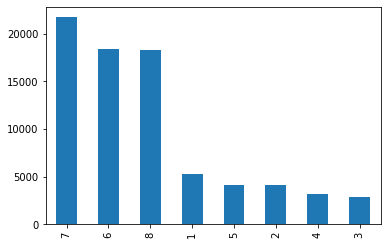

In [52]:
df['datePublishedMonth'] = df['datePublished'].dt.month
df['datePublishedDay'] = df['datePublished'].dt.day
df[df['datePublishedYear'] == 2020]['datePublishedMonth'].value_counts().plot.bar()

In 2020 here is this is a perfect example, most of the comments were posted in June, July and August 

In [53]:
# we have already added two columns in the previous section by adding the year and month of the published year
# we can add more by looking at the time it took for a user to write a comment. We can call this column publishedSerpublishedServiceDifferencevice

In [54]:
df['publishedServiceDifference'] = df['datePublished']-df['dateService']

In [55]:
df['publishedServiceDifference'].mean()

Timedelta('26 days 04:21:48.482972')

In [56]:
# in average consumers took 26 days to post a review

In [57]:
df.head()

,marque,rates,comments,datePublished,dateService,author,answer,datePublishedYear,dateServiceYear,datePublishedMonth,datePublishedDay,publishedServiceDifference
0,DARTY,5,Site internet clair et simple a la navigation....,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37 days
1,DARTY,5,Tout bon,2020-08-21,2020-06-21,np.nan,np.nan,2020,2020,8,21,61 days
2,DARTY,5,La livraison à été conforme à mes attentes. Je...,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37 days
3,DARTY,4,discordance entre les dates de disponibilité a...,2020-08-21,2020-07-12,np.nan,np.nan,2020,2020,8,21,40 days
4,DARTY,5,Impossible de faire un lavage à l'eau froide ;...,2020-08-21,2020-07-25,np.nan,np.nan,2020,2020,8,21,27 days


In [58]:
df.columns 

Index(['marque', 'rates', 'comments', 'datePublished', 'dateService', 'author',
       'answer', 'datePublishedYear', 'dateServiceYear', 'datePublishedMonth',
       'datePublishedDay', 'publishedServiceDifference'],
      dtype='object')

In [59]:
dfPredictAffluence = df.drop(columns=['marque', 'rates', 'comments', 'dateService', 'author',
       'answer', 'dateServiceYear',
       'publishedServiceDifference'])


In [60]:
dfPredictAffluence.head()

,datePublished,datePublishedYear,datePublishedMonth,datePublishedDay
0,2020-08-21,2020,8,21
1,2020-08-21,2020,8,21
2,2020-08-21,2020,8,21
3,2020-08-21,2020,8,21
4,2020-08-21,2020,8,21


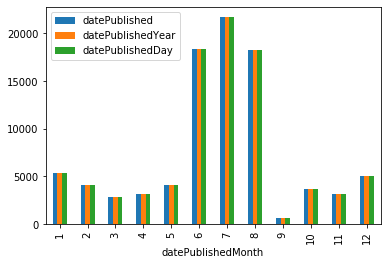

In [61]:
dfPredictAffluence.groupby('datePublishedMonth').count().plot.bar()

In [62]:
# above we have the appropriate model that shows the number of the comments posted during the year. We can see that most comments were posted in june, july or August. this is when they'd need to hire more stuff to response to people. 
# now let's predict the published date of our dataset: 

In [64]:
import datetime as dt
df['datePublishedNumerical']=df['datePublished'].map(dt.datetime.toordinal)
df['dateServiceNumerical']=df['dateService'].map(dt.datetime.toordinal)

In [65]:
df['publishedServiceDifference'] = df['publishedServiceDifference'].dt.days

In [66]:
df.head()

,marque,rates,comments,datePublished,dateService,author,answer,datePublishedYear,dateServiceYear,datePublishedMonth,datePublishedDay,publishedServiceDifference,datePublishedNumerical,dateServiceNumerical
0,DARTY,5,Site internet clair et simple a la navigation....,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37,737658,737621
1,DARTY,5,Tout bon,2020-08-21,2020-06-21,np.nan,np.nan,2020,2020,8,21,61,737658,737597
2,DARTY,5,La livraison à été conforme à mes attentes. Je...,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37,737658,737621
3,DARTY,4,discordance entre les dates de disponibilité a...,2020-08-21,2020-07-12,np.nan,np.nan,2020,2020,8,21,40,737658,737618
4,DARTY,5,Impossible de faire un lavage à l'eau froide ;...,2020-08-21,2020-07-25,np.nan,np.nan,2020,2020,8,21,27,737658,737631


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
df.columns

Index(['marque', 'rates', 'comments', 'datePublished', 'dateService', 'author',
       'answer', 'datePublishedYear', 'dateServiceYear', 'datePublishedMonth',
       'datePublishedDay', 'publishedServiceDifference',
       'datePublishedNumerical', 'dateServiceNumerical'],
      dtype='object')

In [69]:
df["marque"] = df["marque"].astype('category').cat.codes

In [70]:
df.head()

,marque,rates,comments,datePublished,dateService,author,answer,datePublishedYear,dateServiceYear,datePublishedMonth,datePublishedDay,publishedServiceDifference,datePublishedNumerical,dateServiceNumerical
0,0,5,Site internet clair et simple a la navigation....,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37,737658,737621
1,0,5,Tout bon,2020-08-21,2020-06-21,np.nan,np.nan,2020,2020,8,21,61,737658,737597
2,0,5,La livraison à été conforme à mes attentes. Je...,2020-08-21,2020-07-15,np.nan,np.nan,2020,2020,8,21,37,737658,737621
3,0,4,discordance entre les dates de disponibilité a...,2020-08-21,2020-07-12,np.nan,np.nan,2020,2020,8,21,40,737658,737618
4,0,5,Impossible de faire un lavage à l'eau froide ;...,2020-08-21,2020-07-25,np.nan,np.nan,2020,2020,8,21,27,737658,737631


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Predict date of the comment

X = df[['marque', 'dateServiceNumerical']]
y = df['datePublishedNumerical']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
reg = LinearRegression().fit(X_train, y_train)

In [75]:
pred = reg.predict(X_test)

In [76]:
y_test.head()

58913    737631
76455    737592
85503    737620
74301    737587
34860    737647
Name: datePublishedNumerical, dtype: int64

In [77]:
pred

array([737628.75005439, 737591.13397652, 737604.89595623, ...,
       737619.57540125, 737643.42949941, 737596.63876841])

In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [79]:
mean_squared_error(y_test, pred)

487.85162173330315

In [80]:
# based on the time of the service we can predict when the comment will be published. 

In [81]:
dfVentes = pd.read_csv('ventes.csv', sep=';')

In [82]:
dfVentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
Date                   366 non-null object
Ventes FNAC            366 non-null int64
Ventes DARTY           366 non-null int64
Top_categorie_FNAC     366 non-null object
Top_categorie_Darty    366 non-null object
dtypes: int64(2), object(3)
memory usage: 14.4+ KB


In [83]:
dfVentes.head()

,Date,Ventes FNAC,Ventes DARTY,Top_categorie_FNAC,Top_categorie_Darty
0,dimanche 1 septembre 2019,28243,13203,Livre,Informatique
1,lundi 2 septembre 2019,25006,9979,Livre,Electromenager
2,mardi 3 septembre 2019,28193,5684,Livre,Informatique
3,mercredi 4 septembre 2019,29666,7613,Livre,Electromenager
4,jeudi 5 septembre 2019,29584,10154,Livre,Informatique


In [84]:
pip install dateparser

You should consider upgrading via the '/usr/local/opt/python/bin/python3.6 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [85]:
# so what we are going to do is grab is join the two tables in order to predict the number of comments possible

In [90]:
#dfVentes['Date'].dt.month.value_counts()
import dateparser

In [91]:
dfVentes['Date'] = dfVentes.Date.replace('ao˚t', 'août', regex=True)

In [92]:
dfVentes['date1'] = dfVentes.Date.apply(lambda x: dateparser.parse(x))

In [93]:
dfVentes['date1_year'] = dfVentes['date1'].dt.year

In [94]:
dfVentes['date1_month'] = dfVentes['date1'].dt.month

In [95]:
# we are going to create the same table as previously and see what happens and see if there is a correlation between the number of comments and the number of sales

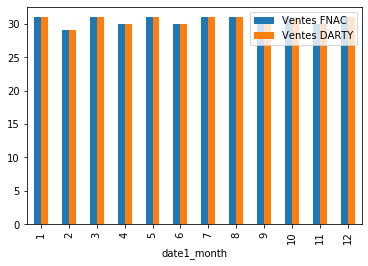

In [96]:
dfVentes[['Ventes FNAC', 'Ventes DARTY', 'date1_month']].groupby('date1_month').count().plot.bar()

In [97]:
# we see that the number of sales doesn't really change all year around
# we are going to add the two columns and see if there is a correlation between the number of sales and the number of comments

In [98]:
dfVentes['Ventes'] = dfVentes['Ventes FNAC'] + dfVentes['Ventes DARTY']

In [99]:
dfVentes.head()

,Date,Ventes FNAC,Ventes DARTY,Top_categorie_FNAC,Top_categorie_Darty,date1,date1_year,date1_month,Ventes
0,dimanche 1 septembre 2019,28243,13203,Livre,Informatique,2019-09-01,2019,9,41446
1,lundi 2 septembre 2019,25006,9979,Livre,Electromenager,2019-09-02,2019,9,34985
2,mardi 3 septembre 2019,28193,5684,Livre,Informatique,2019-09-03,2019,9,33877
3,mercredi 4 septembre 2019,29666,7613,Livre,Electromenager,2019-09-04,2019,9,37279
4,jeudi 5 septembre 2019,29584,10154,Livre,Informatique,2019-09-05,2019,9,39738


In [100]:
dfVentesGroupBy = dfVentes[['Ventes', 'date1_month']].groupby('date1_month').count()

In [101]:
x = dfVentesGroupBy

In [102]:
y = dfPredictAffluence.groupby('datePublishedMonth').sum()

In [103]:
pd.concat([x,y], axis=1).corr()

,Ventes,datePublishedYear,datePublishedDay
Ventes,1.000000,0.215831,0.137865
datePublishedYear,0.215831,1.000000,0.965562
datePublishedDay,0.137865,0.965562,1.000000


In [104]:
y = df.groupby('datePublishedNumerical')['comments'].count()

In [105]:
dfVentes['date1Numerical'] = dfVentes['date1'].map(dt.datetime.toordinal)

In [106]:
X = dfVentes.groupby('date1Numerical')['Ventes'].sum()

In [107]:
predictionTable = pd.concat([X, y], axis=1, join='inner')

In [108]:
predictionTable['date'] = predictionTable.index

In [109]:
predictionTable = predictionTable.reset_index().drop(columns=['index'])

In [110]:
predictionTable.head()

,Ventes,comments,date
0,28612,26,737327
1,33656,141,737328
2,25233,141,737329
3,35581,64,737330
4,31166,128,737331


In [111]:
X_train, X_test, y_train, y_test = train_test_split(predictionTable[['Ventes', 'date']], predictionTable['comments'], test_size=0.33, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [114]:
regr = regr.fit(X_train, y_train)

In [115]:
pred = regr.predict(X_test)

In [117]:
mean_absolute_error(y_test, pred)

82.00827533601516

Let's look at the avg number of commments. We are wrongly predicting the number of comments by 82 on average. which is not bad considering that there are a lot of comments everyday. 

In [119]:
predictionTable['comments'].mean()

269.97014925373134